# COVID-19 Status (Colombia)

##### Limpieza y ajuste de datos (Desarrollador)*

In [1]:
# Libraries import
from datetime import datetime
from plotly.offline import init_notebook_mode, iplot
import requests
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from googletrans import Translator
import matplotlib.pyplot as plt
import statsmodels.api as sn

In [2]:
# Dataset import - 'Datos abiertos COVID-19 (Colombia)'
data = pd.DataFrame.from_dict(requests.get('https://www.datos.gov.co/resource/gt2j-8ykr.json?$limit=999999999').json())
#data

In [3]:
# Data cleaning and adjusting

# FE DE ERRATAS (2020-05-03): --------------------------------------------------------------------------------------------------------------------------------------------------
#data.loc[(data['Edad'].str.contains('-   -'))] = None
data = data[~data['edad'].str.contains('-   -')]
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#translator = Translator()

data.columns = ['Id de caso', 'Fecha de notificación', 'Código DIVIPOLA', 'Ciudad de ubicación', 'Departamento', 'Estado', 'Edad', 'Sexo', 'Tipo', 'Severidad','País de procedencia', 'Fecha de inicio de síntomas', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web', 'Tipo de recuperación', 'Código departamento', 'Código país', 'Pertenecia Étnica', 'Fecha de defunción', 'Nombre Grupo Étnico']

for column in ['Ciudad de ubicación', 'Estado', 'Sexo', 'Tipo', 'Severidad', 'País de procedencia']:
    data[column] = data[column].str.capitalize()
    
for column in ['Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de defunción', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web']:
       data[column] = data[column].str.slice(0,10).replace(r'(\d+)-(\d+)-(\d+)', r'\1-\2-\3', regex=True).apply(lambda x: pd.to_datetime(x, dayfirst=True, errors='ignore'))

data.loc[(data['Edad'].str.contains('[a-zA-Z]+', regex=True)), 'Edad'] = 0
data['Clasificación de edad'] = pd.cut(x=data['Edad'].apply(lambda x: float(x)), bins=[-np.inf,10,20,30,40,50,60,70,80,90,np.inf], include_lowest=True, labels=['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80', '80 - 90', '90 - 100+'])

#data['País de procedencia'] = data['País de procedencia'].apply(Translator().translate, src='es', dest='en').apply(getattr, args=('text',))

data = data[['Id de caso', 'Fecha de reporte web', 'Fecha de diagnóstico', 'Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de recuperación', 'Fecha de defunción', 'Ciudad de ubicación', 'Departamento', 'Severidad', 'Estado', 'Edad', 'Clasificación de edad', 'Sexo', 'Pertenecia Étnica', 'Nombre Grupo Étnico', 'Tipo', 'Tipo de recuperación', 'País de procedencia', 'Código departamento', 'Código país', 'Código DIVIPOLA']]
data = data.set_index('Id de caso')

date = datetime.today().strftime('%Y-%m-%d')
data.to_csv(f'./Datasets/COVID-19 Status (Colombia) [{date}].csv', index = True)

def numbers(div):
    for i in range(0, len(ax.patches)//div, 1):
        height = 0
        for j in range(0, div, 1):
            height += ax.patches[j*(len(ax.patches)//div)+i].get_height()
        ax.text(ax.patches[i].get_x()+(ax.patches[i].get_width()/10),height+(height/100)+10, int(height), fontsize=7, color='dimgrey', rotation=90)

def numbers_H(div):
    for i in range(0, len(ax.patches)//div, 1):
        width = 0
        for j in range(0, div, 1):
            width += ax.patches[j*(len(ax.patches)//div)+i].get_width()
        ax.text(width+(width/100)+10,ax.patches[i].get_y()+(ax.patches[i].get_height()/10), int(width), fontsize=7, color='dimgrey', rotation=0)

In [4]:
# Test

#data['País de procedencia'].unique().apply(lambda x: Translator().translate(x, src='es', dest='en').text)
#Translator().translate('España', src='es', dest='en').text

In [5]:
# In-line plots libraries import

%matplotlib inline
init_notebook_mode(connected = True)

## Análisis Dataset - COVID-19 (Colombia)

### - Datos Abiertos COVID-19 (Colombia)

In [6]:
data

Fecha de reporte web Fecha de diagnóstico Fecha de notificación  \
Id de caso                                                                   
1                    2020-03-06           2020-03-06            2020-03-02   
2                    2020-03-09           2020-03-09            2020-03-06   
3                    2020-03-09           2020-03-09            2020-03-07   
4                    2020-03-11           2020-03-11            2020-03-09   
5                    2020-03-11           2020-03-11            2020-03-09   
...                         ...                  ...                   ...   
218464               2020-07-22           2020-07-22            2020-07-11   
218465               2020-07-22           2020-07-22            2020-07-11   
218466               2020-07-22           2020-07-22            2020-07-11   
218467               2020-07-22           2020-07-22            2020-07-11   
218468               2020-07-22           2020-07-22            2020-07-11   

           Fecha de inicio de síntomas Fecha de recuperación  \
Id de caso                                                     
1                  2020-02-27 00:00:00            2020-03-13   
2                  2020-03-04 00:00:00            2020-03-19   
3                  2020-02-29 00:00:00            2020-03-15   
4                  2020-03-06 00:00:00            2020-03-26   
5                  2020-03-08 00:00:00            2020-03-23   
...                                ...                   ...   
218464             2020-07-06 00:00:00                   NaT   
218465             2020-07-04 00:00:00                   NaT   
218466             2020-07-04 00:00:00                   NaT   
218467             2020-07-04 00:00:00                   NaT   
218468             2020-07-04 00:00:00                   NaT   

           Fecha de defunción  Ciudad de ubicación     Departamento Severidad  \
Id de caso                                                                      
1                         NaT          Bogotá d.c.      Bogotá D.C.      Leve   
2                         NaT  Guadalajara de buga  Valle del Cauca      Leve   
3                         NaT             Medellín        Antioquia      Leve   
4                         NaT             Medellín        Antioquia      Leve   
5                         NaT             Medellín        Antioquia      Leve   
...                       ...                  ...              ...       ...   
218464                    NaT          Bucaramanga        Santander      Leve   
218465                    NaT              Acacías             Meta      Leve   
218466                    NaT        Villavicencio             Meta      Leve   
218467                    NaT        Villavicencio             Meta      Leve   
218468                    NaT        Villavicencio             Meta      Leve   

                Estado  ... Clasificación de edad Sexo Pertenecia Étnica  \
Id de caso              ...                                                
1           Recuperado  ...               10 - 20    F              Otro   
2           Recuperado  ...               30 - 40    M              Otro   
3           Recuperado  ...               40 - 50    F              Otro   
4           Recuperado  ...               50 - 60    M              Otro   
5           Recuperado  ...               20 - 30    M              Otro   
...                ...  ...                   ...  ...               ...   
218464            Casa  ...               40 - 50    M               NaN   
218465            Casa  ...               30 - 40    M               NaN   
218466            Casa  ...               30 - 40    M               NaN   
218467            Casa  ...               30 - 40    F               NaN   
218468            Casa  ...               20 - 30    M               NaN   

           Nombre Grupo Étnico         Tipo Tipo de recuperación  \
Id de caso                                          

### - Mapa de influencia - COVID-19 (Colombia) [Beta]

In [7]:
map_data = dict(
    type = 'choropleth',
    locations = data['País de procedencia'],
    locationmode = 'country names',
    colorscale = 'viridis',
    z = data['País de procedencia'].value_counts().tolist())

geo_map = go.Figure(data=[map_data])
iplot(geo_map)

### - Casos confirmados VS Departamento (Sexo)

In [8]:
data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0)

Sexo                                                    F      M
Departamento                                                    
Amazonas                                             1032   1434
Antioquia                                            8550  11201
Arauca                                                 36    137
Archipiélago de San Andrés Providencia y Santa ...      9     22
Atlántico                                            9173  10488
Barranquilla D.E.                                   12114  14173
Bogotá D.C.                                         34963  35886
Bolívar                                               819   1032
Boyacá                                                346    348
Buenaventura D.E.                                     714   1221
Caldas                                                263    247
Caquetá                                               237    239
Cartagena D.T. y C.                                  6172   7691
Casanare                                               77    112
Cauca                                                 565    744
Cesar                                                 978   1247
Chocó                                                1254   1459
Cundinamarca                                         3125   3233
Córdoba                                              1588   1585
Guainía                                                 6      8
Guaviare                                                8     43
Huila                                                 302    288
La Guajira                                            800    862
Magdalena                                             818    882
Meta                                                  507   1569
Nariño                                               2723   3269
Norte de Santander                                    485    645
Putumayo                                              169    217
Quindío                                               122    101
Risaralda                                             597    514
Santa Marta D.T. y C.                                1406   1512
Santander                                             840   1294
Sucre                                                2159   2567
Tolima                                                605   1304
Valle del Cauca                                      7943   9286
Vaupés                                                 27     34
Vichada                                                 1      1

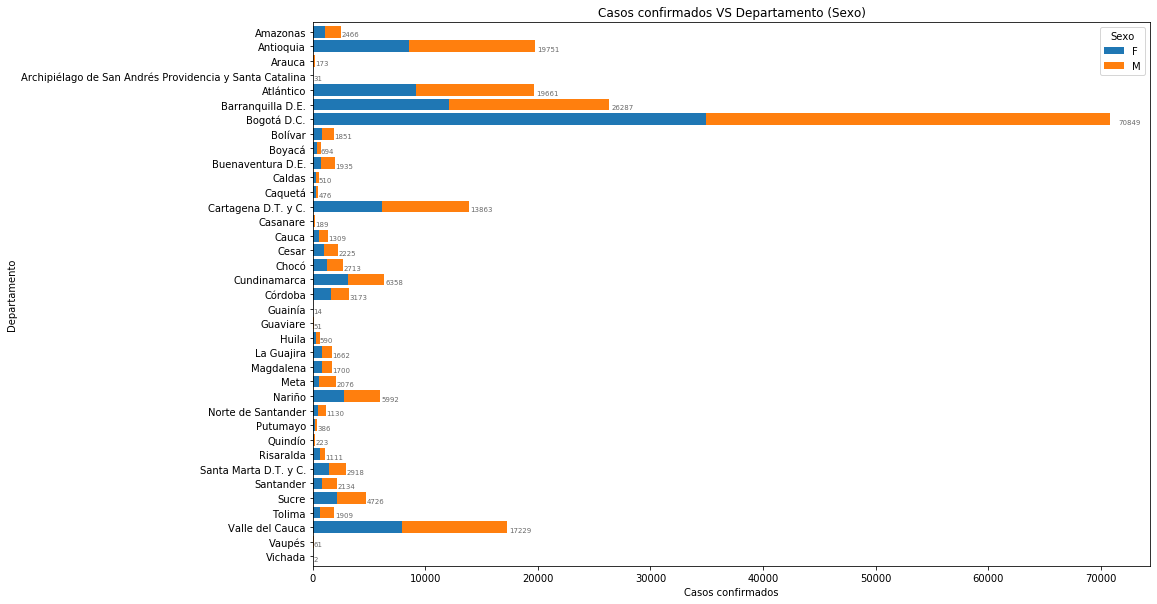

In [9]:
ax = data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Clasificación de edad)

In [10]:
data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad                               0 - 10  10 - 20  20 - 30  \
Departamento                                                                   
Amazonas                                               129      446      508   
Antioquia                                              721     1422     5325   
Arauca                                                   6       35       68   
Archipiélago de San Andrés Providencia y Santa ...       0        1        9   
Atlántico                                              844     1447     4315   
Barranquilla D.E.                                      996     1640     5778   
Bogotá D.C.                                           3264     5579    16170   
Bolívar                                                 83      179      414   
Boyacá                                                  43       63      145   
Buenaventura D.E.                                       41      273      442   
Caldas                                                  17       34      113   
Caquetá                                                 13       30      149   
Cartagena D.T. y C.                                    570      982     3196   
Casanare                                                10        8       54   
Cauca                                                   60      115      306   
Cesar                                                  171      217      519   
Chocó                                                  113      227      627   
Cundinamarca                                           316      471     1451   
Córdoba                                                111      157      639   
Guainía                                                  0        2        4   
Guaviare                                                 0       19       10   
Huila                                                   37       58      115   
La Guajira                                              87      165      376   
Magdalena                                               93      128      301   
Meta                                                    32      138      671   
Nariño                                                 292      542     1397   
Norte de Santander                                      45       45      267   
Putumayo                                                 9       31       97   
Quindío                                                  8       14       36   
Risaralda                                               78       99      244   
Santa Marta D.T. y C.                                  123      202      650   
Santander                                               78      188      536   
Sucre                                                  197      352     1003   
Tolima                                                  75      113      625   
Valle del Cauca                                        602     1202     3940   
Vaupés                                                   4        5       19   
Vichada                                                  0        1        0   

Clasificación de edad                               30 - 40  40 - 50  50 - 60  \
Departamento                                                                    
Amazonas                                                475      331      268   
Antioquia                                              4979     3071     2255   
Arauca                                                   42       12        6   
Archipiélago de San Andrés Providencia y Santa ...       10        6        3   
Atlántico                                              4629     3113     2549   
Barranquilla D.E.                                      6265     4096     3534   
Bogotá D.C.                                           15417    11330     9582   
Bolívar                                                 438      268      164   
Boyacá                                                  128      107 

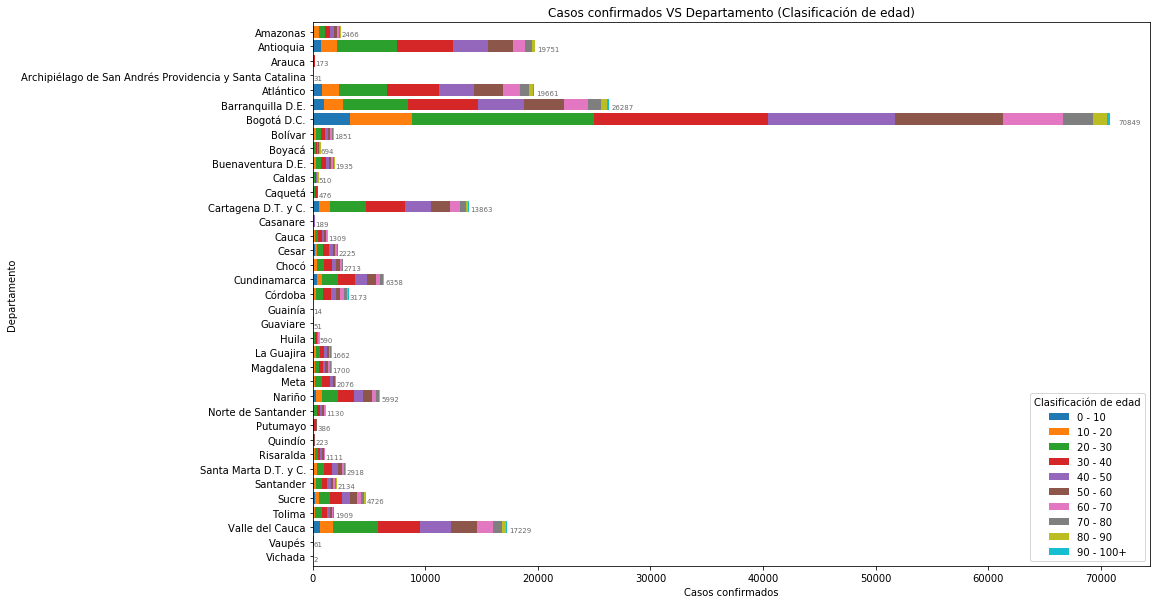

In [11]:
ax = data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Estado)

In [12]:
data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0)

Estado                                                 Casa  Fallecido  \
Departamento                                                             
Amazonas                                               66.0      101.0   
Antioquia                                           13446.0      239.0   
Arauca                                                 79.0        1.0   
Archipiélago de San Andrés Providencia y Santa ...      7.0        0.0   
Atlántico                                            6257.0      928.0   
Barranquilla D.E.                                    8316.0     1337.0   
Bogotá D.C.                                         37102.0     1794.0   
Bolívar                                               635.0       86.0   
Boyacá                                                257.0       22.0   
Buenaventura D.E.                                     318.0      128.0   
Caldas                                                217.0        7.0   
Caquetá                                               365.0        7.0   
Cartagena D.T. y C.                                  3870.0      430.0   
Casanare                                               88.0        3.0   
Cauca                                                 680.0       37.0   
Cesar                                                 828.0       42.0   
Chocó                                                 823.0       83.0   
Cundinamarca                                         2773.0      150.0   
Córdoba                                              1610.0      357.0   
Guainía                                                 0.0        1.0   
Guaviare                                               10.0        0.0   
Huila                                                 190.0       17.0   
La Guajira                                            937.0       92.0   
Magdalena                                             536.0      168.0   
Meta                                                  629.0       26.0   
Nariño                                               2042.0      179.0   
Norte de Santander                                    684.0       42.0   
Putumayo                                              287.0       18.0   
Quindío                                                44.0        6.0   
Risaralda                                             496.0       22.0   
Santa Marta D.T. y C.                                1439.0      109.0   
Santander                                            1138.0       54.0   
Sucre                                                2451.0      258.0   
Tolima                                                711.0       34.0   
Valle del Cauca                                      6701.0      594.0   
Vaupés                                                 32.0        1.0   
Vichada                                                 0.0        0.0   

Estado                                              Hospital  Hospital uci  \
Departamento                                                                 
Amazonas                                                12.0           6.0   
Antioquia                                              842.0         142.0   
Arauca                                                   6.0           1.0   
Archipiélago de San Andrés Providencia y Santa ...       0.0           0.0   
Atlántico                                              702.0         100.0   
Barranquilla D.E.                                      969.0         129.0   
Bogotá D.C.                                           4216.0         347.0   
Bolívar                                                101.0           6.0   
Boyacá                                                  51.0           5.0   
Buenaventura D.E.                                      117.0          25.0   
Caldas                                                  24.0           7.0   
Caquetá                                                 47.0           4.0   
Cartagena D.T. y C.  

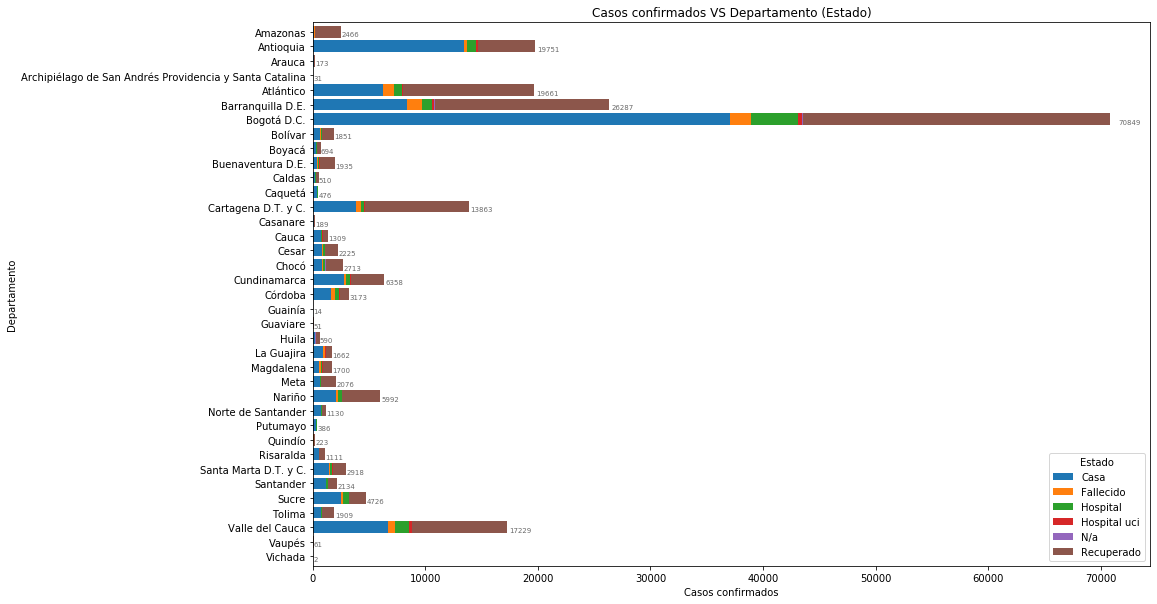

In [13]:
ax = data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Sexo)

In [14]:
data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0)

Sexo              F      M
Estado                    
Casa          45750  50314
Fallecido      2728   4645
Hospital       4907   6564
Hospital uci    514    956
N/a             186    251
Recuperado    47448  54165

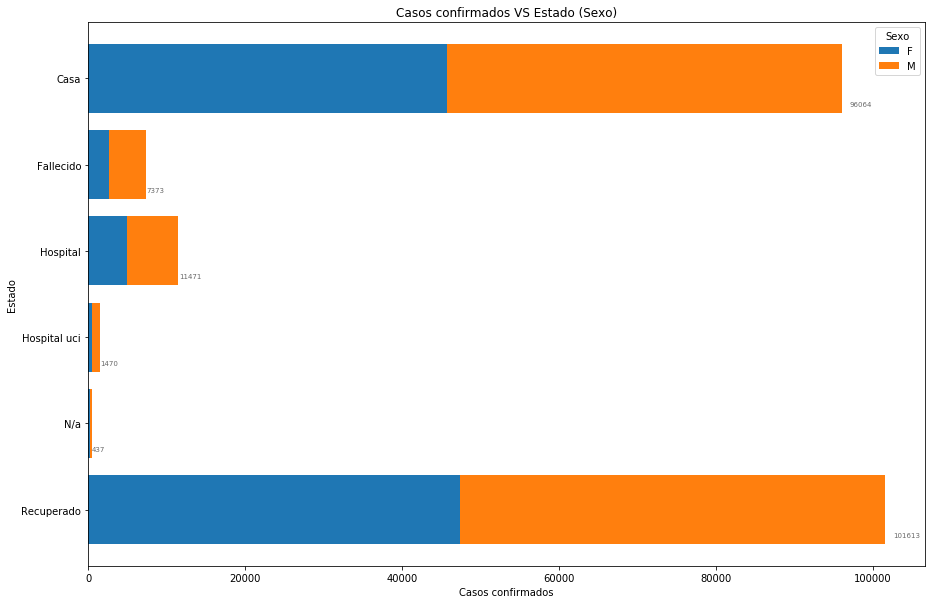

In [15]:
ax = data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Clasificación de edad)

In [16]:
data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Estado                                                                       
Casa                     4018     7422    24183    23930    15531    11691   
Fallecido                  14       15      107      259      600     1145   
Hospital                  429      259      932     1487     1800     2387   
Hospital uci               55       25       50      155      213      362   
N/a                        11        8       18       19       34       52   
Recuperado               4741     8901    25229    24411    15940    12119   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Estado                                                       
Casa                      5686     2425     1001        177  
Fallecido                 1752     1813     1351        317  
Hospital                  2058     1355      668         96  
Hospital uci               322      212       71          5  
N/a                         90       95       86         24  
Recuperado                6219     2806     1077        170

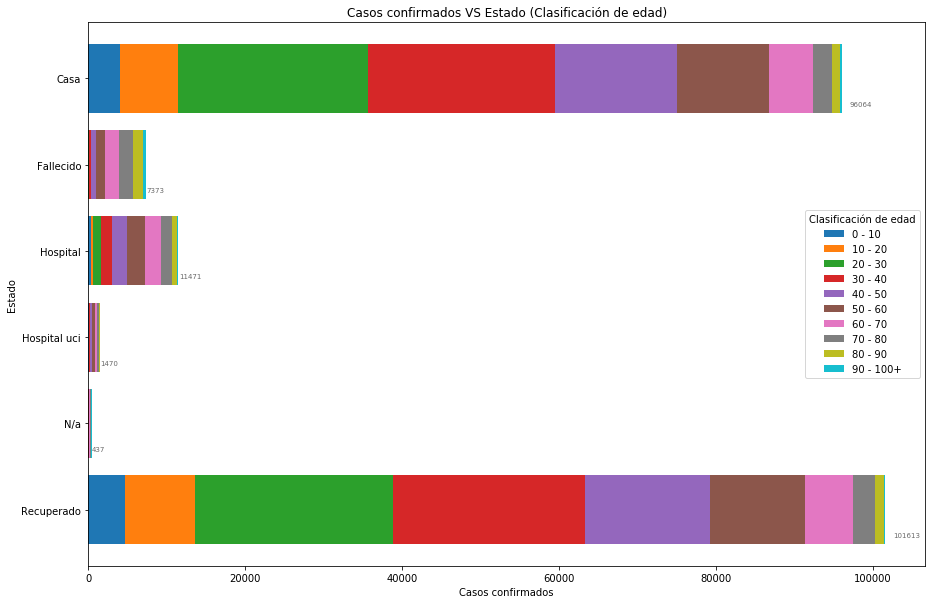

In [17]:
ax = data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo de contagio (Sexo)

In [18]:
data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0)

Sexo             F       M
Tipo                      
En estudio   95462  104151
Importado      453     513
Relacionado   5618   12231

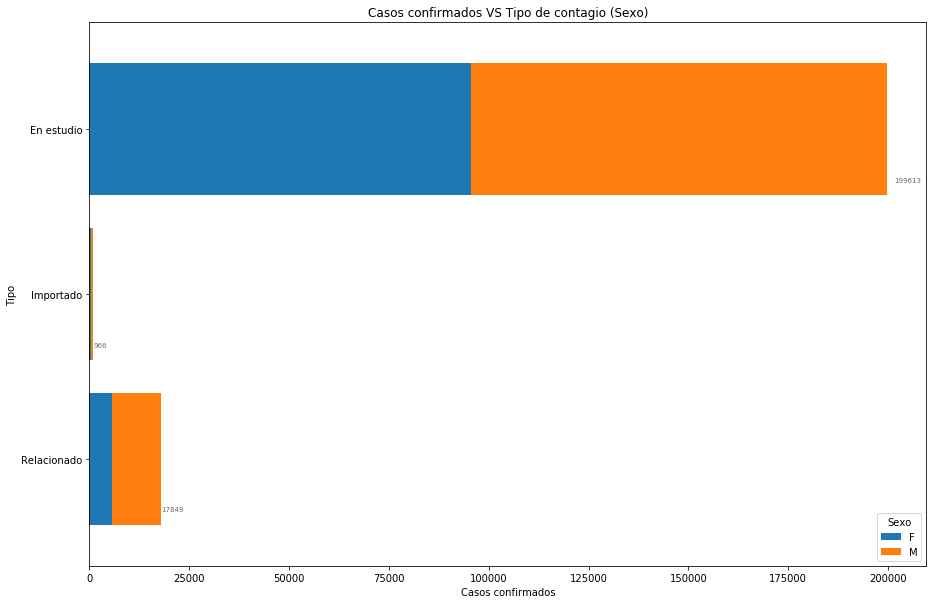

In [19]:
ax = data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo de contagio (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo (Clasificación de edad)

In [20]:
data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Tipo                                                                         
En estudio               8422    14234    45278    45777    31697    25968   
Importado                   6       36      239      226      171      149   
Relacionado               840     2360     5002     4258     2250     1639   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Tipo                                                         
En estudio               15206     8262     4031        738  
Importado                   94       35        9          1  
Relacionado                827      409      214         50

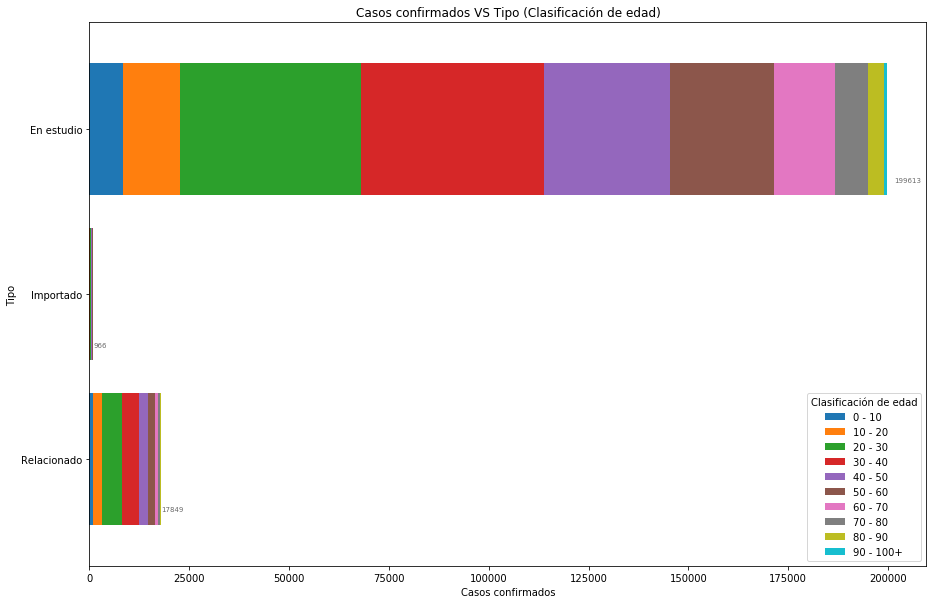

In [21]:
ax = data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Sexo)

In [22]:
data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0)

Sexo                       F      M
Clasificación de edad              
0 - 10                  4616   4652
10 - 20                 7653   8977
20 - 30                23787  26732
30 - 40                22883  27378
40 - 50                15916  18202
50 - 60                12779  14977
60 - 70                 7412   8715
70 - 80                 3941   4765
80 - 90                 2087   2167
90 - 100+                459    330

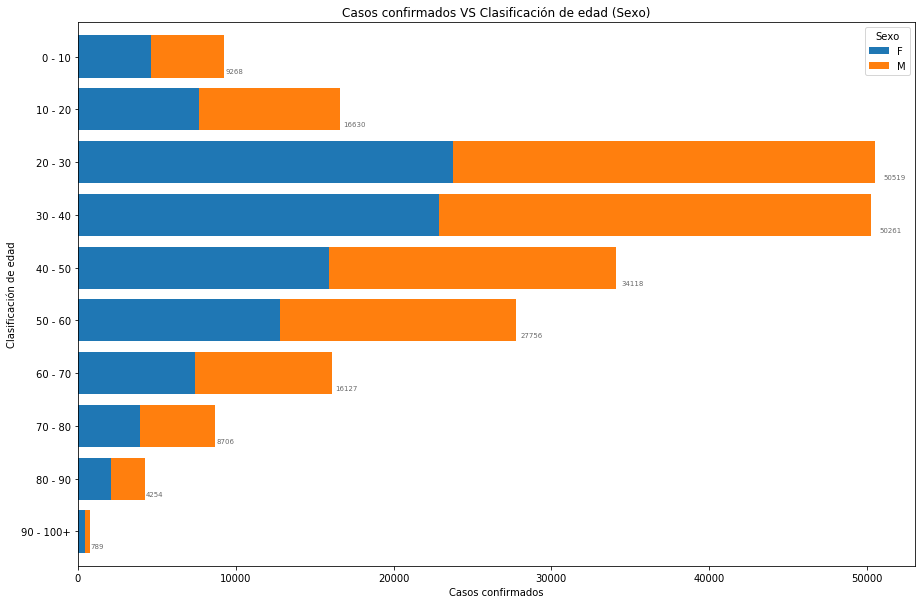

In [23]:
ax = data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Estado)

In [24]:
data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Clasificación de edad                                                  
0 - 10                  4018         14       429            55   11   
10 - 20                 7422         15       259            25    8   
20 - 30                24183        107       932            50   18   
30 - 40                23930        259      1487           155   19   
40 - 50                15531        600      1800           213   34   
50 - 60                11691       1145      2387           362   52   
60 - 70                 5686       1752      2058           322   90   
70 - 80                 2425       1813      1355           212   95   
80 - 90                 1001       1351       668            71   86   
90 - 100+                177        317        96             5   24   

Estado                 Recuperado  
Clasificación de edad              
0 - 10                       4741  
10 - 20                      8901  
20 - 30                     25229  
30 - 40                     24411  
40 - 50                     15940  
50 - 60                     12119  
60 - 70                      6219  
70 - 80                      2806  
80 - 90                      1077  
90 - 100+                     170

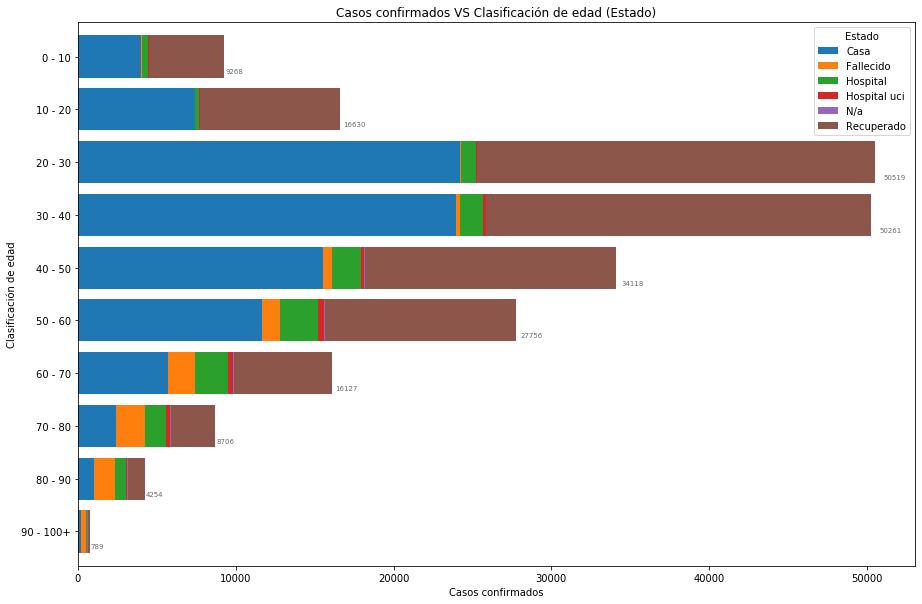

In [25]:
ax = data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Fecha de diagnóstico (Sexo)

In [26]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0)

Sexo                       F       M
Fecha de diagnóstico                
2020-03-06               1.0     0.0
2020-03-09               1.0     1.0
2020-03-11               4.0     2.0
2020-03-12               5.0     0.0
2020-03-13               2.0     3.0
...                      ...     ...
2020-07-18            2559.0  2766.0
2020-07-19            3593.0  3914.0
2020-07-20            2380.0  2755.0
2020-07-21            2952.0  3249.0
2020-07-22             866.0  1023.0

[136 rows x 2 columns]

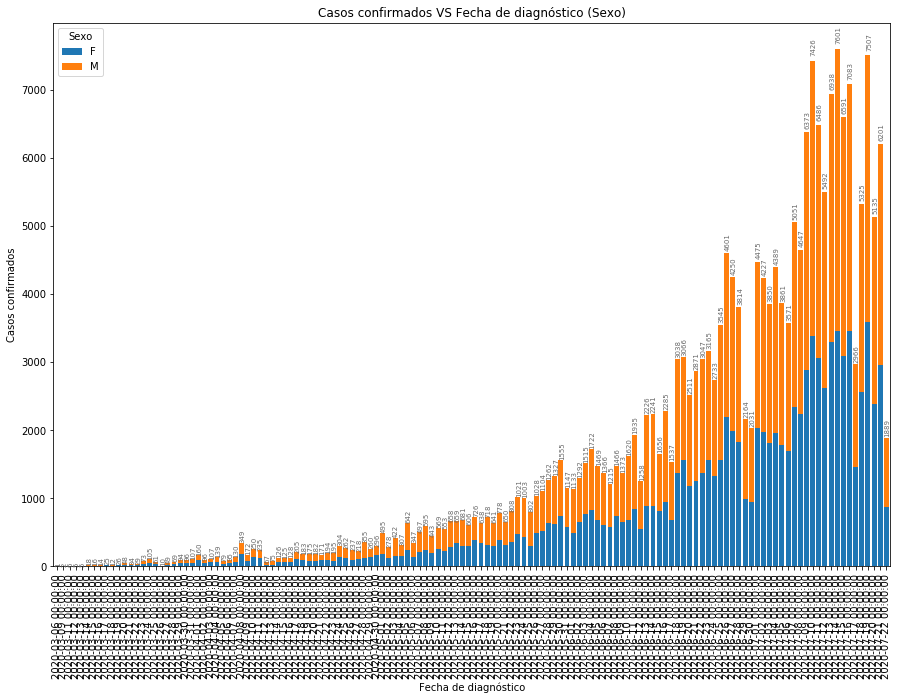

In [27]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)

In [28]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        0        0        1        1        0   
2020-03-11                  0        0        4        0        0        1   
2020-03-12                  0        0        0        1        1        1   
2020-03-13                  0        0        1        0        2        0   
...                       ...      ...      ...      ...      ...      ...   
2020-07-18                207      316     1183     1321      862      696   
2020-07-19                307      630     1739     1767     1228      923   
2020-07-20                219      336     1091     1172      840      693   
2020-07-21                245      413     1489     1422     1017      776   
2020-07-22                 57      137      437      441      280      253   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        0          0  
2020-03-13                   2        0        0          0  
...                        ...      ...      ...        ...  
2020-07-18                 391      220      109         20  
2020-07-19                 511      249      125         28  
2020-07-20                 435      224       98         27  
2020-07-21                 445      245      131         18  
2020-07-22                 141       93       42          8  

[136 rows x 10 columns]

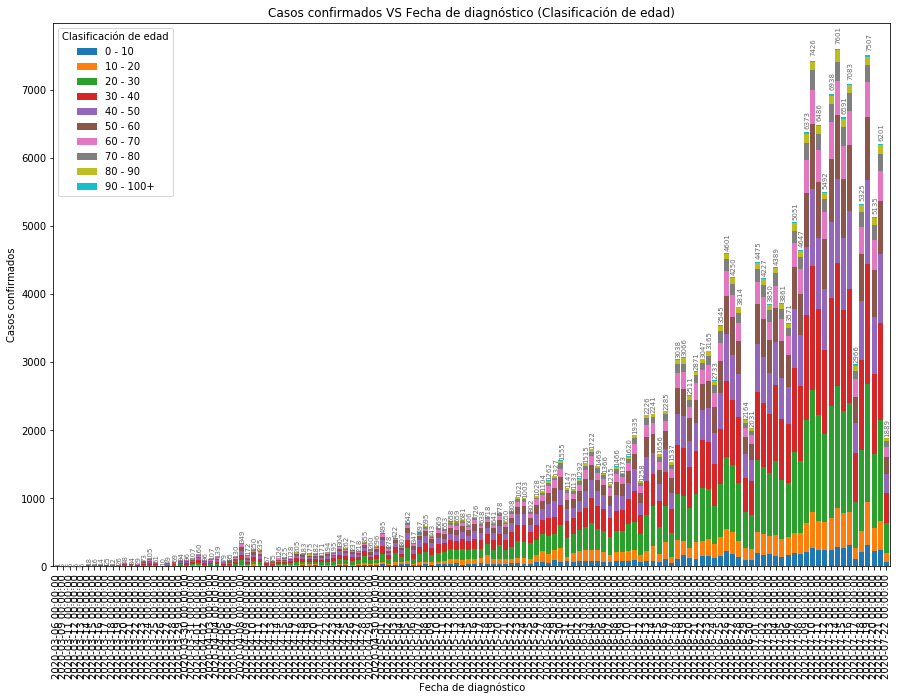

In [29]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Estado)

In [30]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Fecha de diagnóstico                                                   
2020-03-06               0.0        0.0       0.0           0.0  0.0   
2020-03-09               0.0        0.0       0.0           0.0  0.0   
2020-03-11               0.0        0.0       0.0           0.0  0.0   
2020-03-12               0.0        0.0       0.0           0.0  0.0   
2020-03-13               0.0        0.0       0.0           0.0  0.0   
...                      ...        ...       ...           ...  ...   
2020-07-18            4871.0       90.0     291.0          18.0  9.0   
2020-07-19            6924.0      131.0     409.0          22.0  5.0   
2020-07-20            4568.0       72.0     477.0          16.0  1.0   
2020-07-21            5704.0       31.0     423.0          43.0  0.0   
2020-07-22            1658.0        0.0     205.0          26.0  0.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   2.0  
2020-03-11                   6.0  
2020-03-12                   5.0  
2020-03-13                   5.0  
...                          ...  
2020-07-18                  46.0  
2020-07-19                  16.0  
2020-07-20                   1.0  
2020-07-21                   0.0  
2020-07-22                   0.0  

[136 rows x 6 columns]

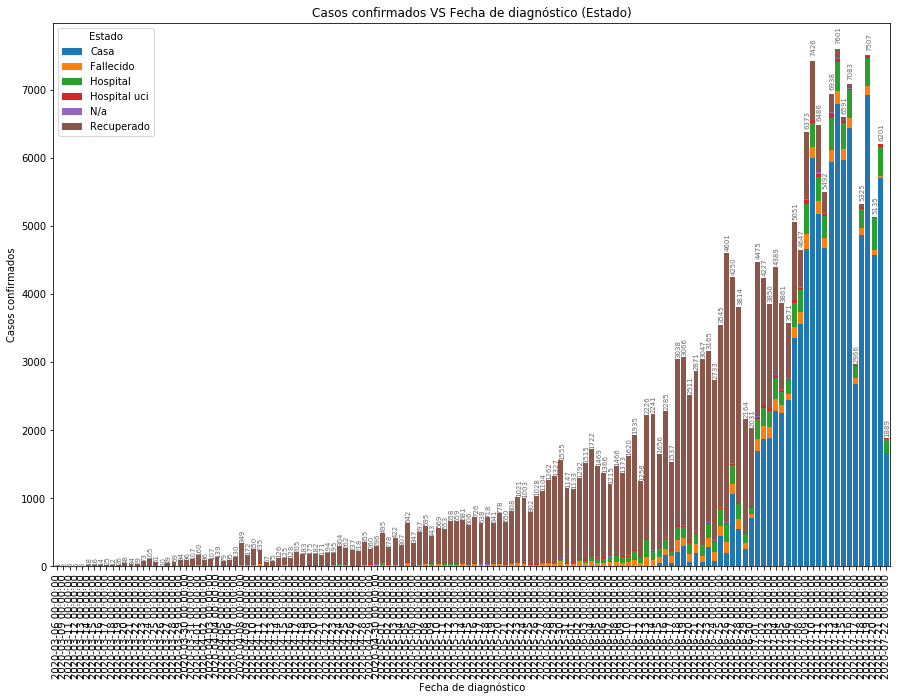

In [31]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)

In [32]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum()

Sexo                        F         M
Fecha de diagnóstico                   
2020-03-06                1.0       0.0
2020-03-09                2.0       1.0
2020-03-11                6.0       3.0
2020-03-12               11.0       3.0
2020-03-13               13.0       6.0
...                       ...       ...
2020-07-18            89967.0  103965.0
2020-07-19            93560.0  107879.0
2020-07-20            95940.0  110634.0
2020-07-21            98892.0  113883.0
2020-07-22            99758.0  114906.0

[136 rows x 2 columns]

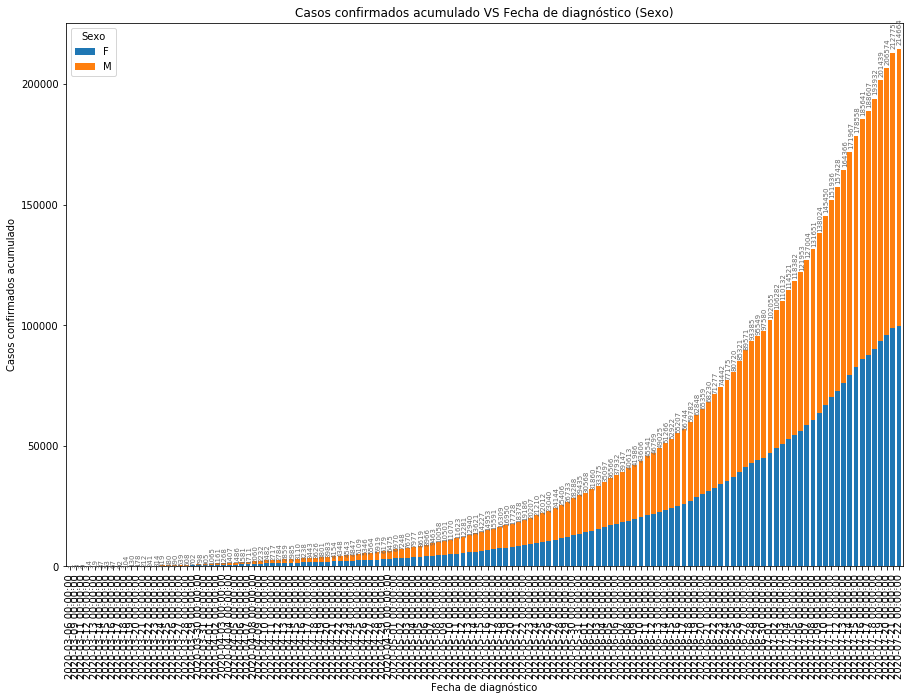

In [33]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Clasificación de edad)

In [34]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum()

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        1        0        1        1        0   
2020-03-11                  0        1        4        1        1        1   
2020-03-12                  0        1        4        2        2        2   
2020-03-13                  0        1        5        2        4        2   
...                       ...      ...      ...      ...      ...      ...   
2020-07-18               8309    14839    44865    44553    30200    24650   
2020-07-19               8616    15469    46604    46320    31428    25573   
2020-07-20               8835    15805    47695    47492    32268    26266   
2020-07-21               9080    16218    49184    48914    33285    27042   
2020-07-22               9137    16355    49621    49355    33565    27295   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        1          0  
2020-03-13                   3        1        1          0  
...                        ...      ...      ...        ...  
2020-07-18               14307     7737     3774        698  
2020-07-19               14818     7986     3899        726  
2020-07-20               15253     8210     3997        753  
2020-07-21               15698     8455     4128        771  
2020-07-22               15839     8548     4170        779  

[136 rows x 10 columns]

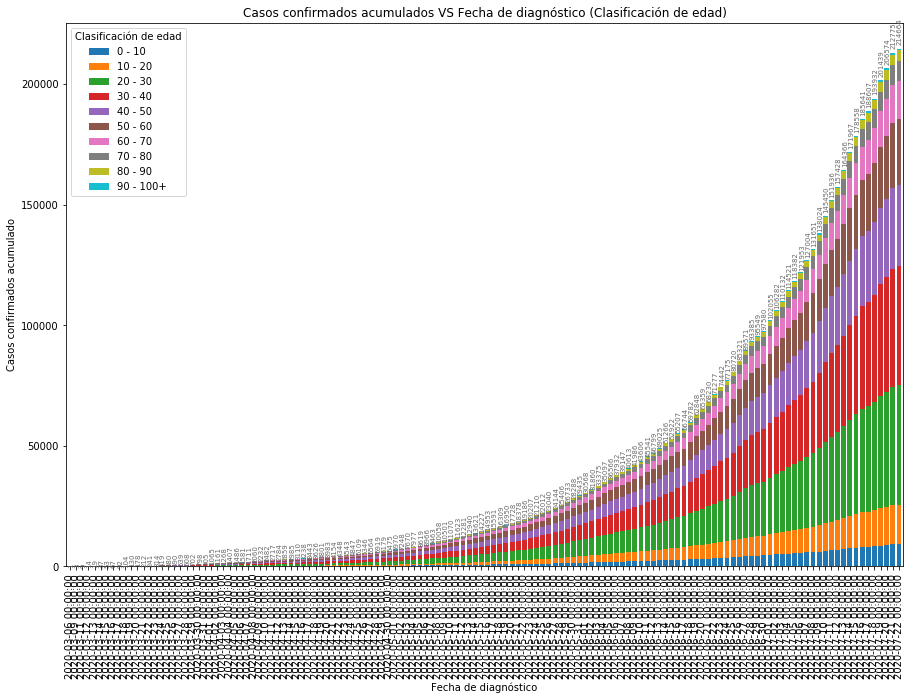

In [35]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Estado)

In [36]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum()

Estado                   Casa  Fallecido  Hospital  Hospital uci    N/a  \
Fecha de diagnóstico                                                      
2020-03-06                0.0        0.0       0.0           0.0    0.0   
2020-03-09                0.0        0.0       0.0           0.0    0.0   
2020-03-11                0.0        0.0       0.0           0.0    0.0   
2020-03-12                0.0        0.0       0.0           0.0    0.0   
2020-03-13                0.0        0.0       0.0           0.0    0.0   
...                       ...        ...       ...           ...    ...   
2020-07-18            77142.0     6969.0    9802.0        1329.0  413.0   
2020-07-19            84066.0     7100.0   10211.0        1351.0  418.0   
2020-07-20            88634.0     7172.0   10688.0        1367.0  419.0   
2020-07-21            94338.0     7203.0   11111.0        1410.0  419.0   
2020-07-22            95996.0     7203.0   11316.0        1436.0  419.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   3.0  
2020-03-11                   9.0  
2020-03-12                  14.0  
2020-03-13                  19.0  
...                          ...  
2020-07-18               98277.0  
2020-07-19               98293.0  
2020-07-20               98294.0  
2020-07-21               98294.0  
2020-07-22               98294.0  

[136 rows x 6 columns]

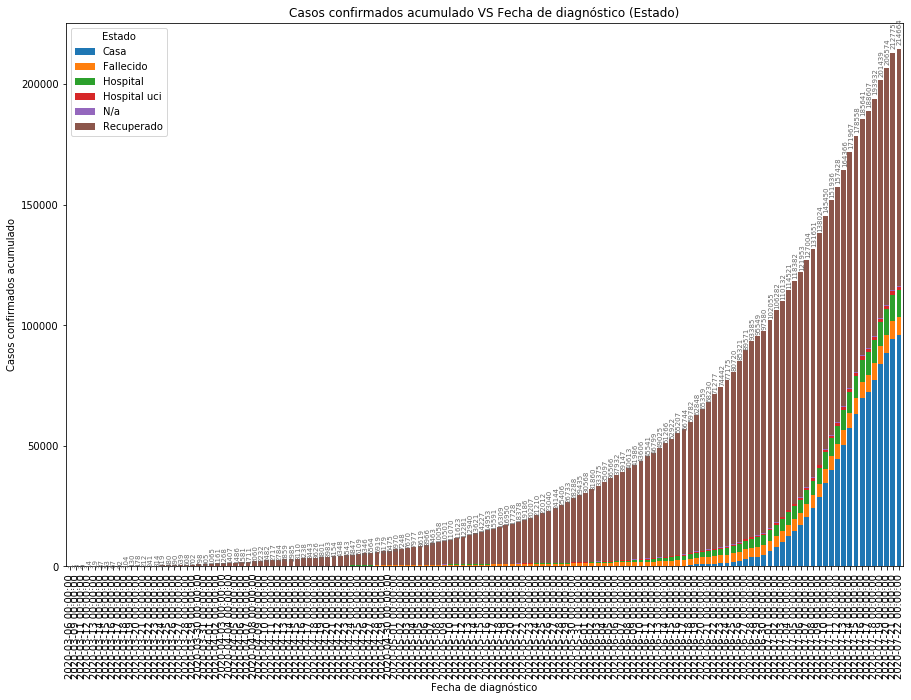

In [37]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Estado'].unique())
numbers(div)

## #StayHome #QuédateEnCasa

### Made with ♥ by <a href='https://github.com/jlcadavid'>@jlcadavid</a>